In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sb

In [2]:
data = pd.read_csv('IceCreamData.csv')
data.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


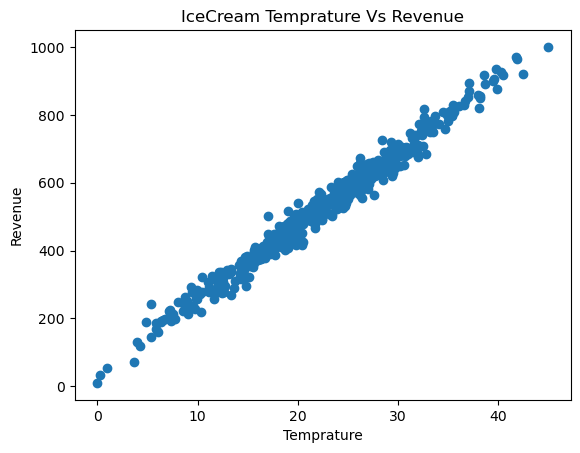

In [3]:
plt.scatter(data['Temperature'],data['Revenue'])
plt.xlabel('Temprature')
plt.ylabel('Revenue')
plt.title('IceCream Temprature Vs Revenue')
plt.show()

<Axes: >

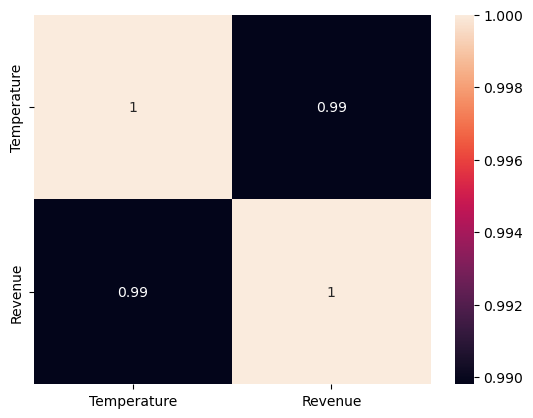

In [5]:
dataCorr = data.corr()
sb.heatmap(dataCorr, annot=True)

In [10]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
xTrain = np.asanyarray(data[['Temperature']])
yTrain = np.asanyarray(data[['Revenue']])
print('X_Train: \n',xTrain)
print('Y_Train: \n',yTrain)
regress.fit(xTrain,yTrain)
print('Coefficients: ',regress.coef_)
print('Intercept: ',regress.intercept_)

X_Train: 
 [[24.56688442]
 [26.00519115]
 [27.79055388]
 [20.59533505]
 [11.50349764]
 [14.35251388]
 [13.70777988]
 [30.83398474]
 [ 0.97686999]
 [31.66946458]
 [11.45525338]
 [ 3.66466958]
 [18.81182403]
 [13.62450892]
 [39.53990899]
 [18.48314099]
 [25.93537514]
 [42.51528041]
 [29.58948056]
 [21.77594799]
 [25.45783637]
 [15.21456942]
 [22.61931574]
 [16.25872074]
 [23.88172478]
 [18.97830025]
 [15.6614643 ]
 [29.18504465]
 [19.02461092]
 [35.12015142]
 [24.18393726]
 [15.23119012]
 [ 8.79095281]
 [18.23322784]
 [35.62892497]
 [37.05754246]
 [22.28455032]
 [17.51707397]
 [31.7379196 ]
 [17.04973761]
 [23.0034888 ]
 [ 8.75555394]
 [18.77535808]
 [14.10966102]
 [18.63391286]
 [15.67648661]
 [20.94791347]
 [30.6353071 ]
 [20.47359412]
 [31.22898848]
 [ 6.39383463]
 [27.18581031]
 [28.63373276]
 [27.99922248]
 [10.32638937]
 [27.31281141]
 [33.23567229]
 [36.56911506]
 [12.46293731]
 [14.37969698]
 [16.30255473]
 [11.56964367]
 [33.55141872]
 [ 3.98652317]
 [20.51163741]
 [ 6.5425144 ]

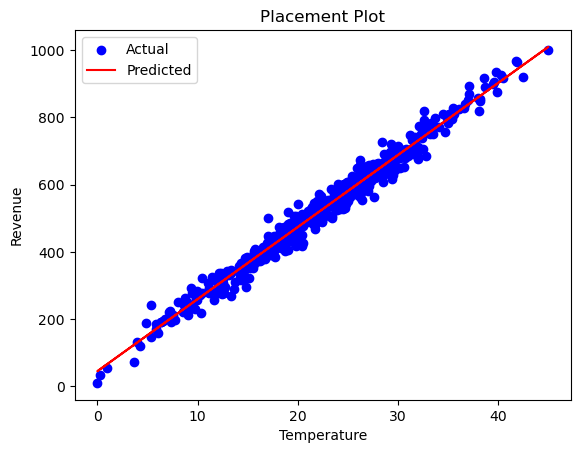

In [11]:
plt.scatter(data.Temperature,data.Revenue,   color='blue',label="Actual")
plt.plot(xTrain,regress.coef_[0][0]*xTrain+regress.intercept_[0],'-r',label="Predicted")
plt.title("Placement Plot")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.show()

In [12]:
y_predicted = regress.predict(xTrain)
for i in range(0,len(xTrain)):
    print(yTrain[i],y_predicted[i])
data['Predicted']=y_predicted

# print(datafile.head())

[534.7990284] [571.63433656]
[625.1901215] [602.47684744]
[660.6322888] [640.76149723]
[487.7069603] [486.46991917]
[316.2401944] [291.50796255]
[367.9407438] [352.60119987]
[308.8945179] [338.77576542]
[696.7166402] [706.02368886]
[55.39033824] [65.77890131]
[737.8008241] [723.93940567]
[325.9684084] [290.4734307]
[71.16015301] [123.41506912]
[467.4467066] [448.22497676]
[289.5409341] [336.99013414]
[905.4776043] [892.7102682]
[469.9090332] [441.17682074]
[648.2099977] [600.97973907]
[921.508275] [956.51301868]
[649.5611747] [679.33700727]
[534.6228653] [511.78654093]
[612.1539491] [590.73957652]
[353.3256334] [371.08679604]
[524.2361154] [529.87140313]
[374.231135] [393.47718592]
[523.1245467] [556.94202982]
[473.6043349] [451.79483048]
[402.4553204] [380.66984249]
[679.3177906] [670.66443508]
[517.5340283] [452.78789915]
[809.6720534] [797.93464202]
[528.3804165] [563.42256107]
[356.0980075] [371.44320411]
[237.7639106] [233.34116699]
[418.1372788] [435.81777674]
[809.4634112] [808.

In [13]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(yTrain,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(yTrain,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(yTrain,y_predicted)))

Mean Absolute error  19.585861206200104
Mean Squared error  623.0963653020007
Root Mean Squared error  24.96189827120527


In [14]:
from sklearn.metrics import r2_score
xTest=np.asanyarray(data[['Temperature']])
yTest=np.asanyarray(data[['Revenue']])
test_y_predicted=regress.predict(xTest)
print('Mean Absolute error (MAE)', np.mean(np.absolute(test_y_predicted-yTest)))
print('Mean Squared error (MSE)', np.mean(test_y_predicted-yTest)**2)
print('R2 score:%0.2f ', r2_score(yTest,test_y_predicted))


Mean Absolute error (MAE) 19.585861206200104
Mean Squared error (MSE) 5.0164497495249075e-27
R2 score:%0.2f  0.979707200117581


In [15]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(data[['Temperature']],data[['Revenue']],test_size=0.30)
print(xTrain)
print("Testing")
print(xTest)

from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(xTrain,yTrain)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)



     Temperature
113    31.668485
481    30.085190
186    35.359761
19     21.775948
38     31.737920
..           ...
246    25.422947
449    19.278672
416    20.563015
498    22.362402
225    21.540459

[350 rows x 1 columns]
Testing
     Temperature
413    41.766589
89     14.384083
194    16.557948
428    27.721440
52     28.633733
..           ...
491    34.472169
334    30.456740
110    25.419302
353    24.528853
441    19.202970

[150 rows x 1 columns]
Coefficients: [[21.26968901]]
Intercept: [48.22243018]


In [16]:
y_predicted=regress.predict(xTest)
print(xTest)
print(yTest)
print(y_predicted)

     Temperature
413    41.766589
89     14.384083
194    16.557948
428    27.721440
52     28.633733
..           ...
491    34.472169
334    30.456740
110    25.419302
353    24.528853
441    19.202970

[150 rows x 1 columns]
        Revenue
413  969.291630
89   361.119144
194  401.924792
428  654.894955
52   666.136835
..          ...
491  809.352519
334  684.803070
110  603.037118
353  594.110352
441  459.735350

[150 rows x 1 columns]
[[ 936.58479172]
 [ 354.1674129 ]
 [ 400.40483391]
 [ 637.84883764]
 [ 657.25302114]
 [ 794.67781735]
 [ 888.65494453]
 [ 497.63236093]
 [ 534.67217159]
 [ 322.63913614]
 [ 240.05078261]
 [ 492.68702211]
 [ 318.44782545]
 [ 719.91897574]
 [ 500.88216522]
 [ 585.0938024 ]
 [ 802.40595998]
 [ 251.50271602]
 [  69.00015105]
 [ 569.00882193]
 [ 199.39655355]
 [ 360.58790249]
 [ 283.44597366]
 [ 584.80933222]
 [ 509.44342094]
 [ 133.01453819]
 [ 728.94532193]
 [ 578.89511313]
 [ 905.47103738]
 [ 581.16173093]
 [ 761.85067215]
 [ 540.67957915]
 [ 462.86955

In [17]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regress,data[['Temperature']],data[['Revenue']],cv=5,scoring='r2')
print(accuracy)

[0.98441089 0.97695706 0.97404612 0.98370302 0.9749989 ]
